In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
test_data = pd.read_csv('test_data.txt', delimiter='\t')

In [ ]:
test_data

,ACCOUNT_TYPE,OPENED_DT,ACC_CONDITION,LIMIT,CUR_BALANCE_AMT,AMT_PAST_DUE,PAYMT_PAT,CLOSED_DT,AMT_OUTSTANDING
0,7,11.01.2021,0,10000,29385,0,1111111111111111111111,11.01.2071,0
1,7,11.01.2021,0,91000,87641,0,1111111111111111111111,11.01.2071,0
2,7,11.01.2021,0,10000,0,0,111111111111111XXXXXXX,11.01.2071,0
3,7,12.01.2021,0,60000,0,0,1111111111111111111111,12.01.2071,0
4,7,12.01.2021,13,58000,0,0,111,12.01.2071,0
...,...,...,...,...,...,...,...,...,...
4356,9,23.03.2021,13,800000,852984,0,11111110,23.03.2026,0
4357,9,23.03.2021,0,443548,242459,0,11111111111111111110,23.03.2027,264550
4358,9,23.03.2021,0,520968,305633,0,11111111111111111110,25.03.2024,259809
4359,9,23.03.2021,13,150000,170866,0,1111111111111111110,25.03.2024,0


In [ ]:
consumer_loan_data = test_data.loc[test_data['ACCOUNT_TYPE'] == 9]
consumer_loan_data

,ACCOUNT_TYPE,OPENED_DT,ACC_CONDITION,LIMIT,CUR_BALANCE_AMT,AMT_PAST_DUE,PAYMT_PAT,CLOSED_DT,AMT_OUTSTANDING
1679,9,06.01.2021,0,663978,427356,0,1111111111111111111110,09.01.2024,292374
1680,9,06.01.2021,13,203763,210588,0,111111111110,09.01.2024,0
1681,9,06.01.2021,13,569892,597359,0,111111110,09.01.2026,0
1682,9,08.01.2021,0,1094100,369959,0,1B11111111111111111110,10.01.2028,853394
1683,9,08.01.2021,0,1234000,525095,0,1111111171111111111110,10.01.2028,1046129
...,...,...,...,...,...,...,...,...,...
4356,9,23.03.2021,13,800000,852984,0,11111110,23.03.2026,0
4357,9,23.03.2021,0,443548,242459,0,11111111111111111110,23.03.2027,264550
4358,9,23.03.2021,0,520968,305633,0,11111111111111111110,25.03.2024,259809
4359,9,23.03.2021,13,150000,170866,0,1111111111111111110,25.03.2024,0


In [ ]:
credit_card_data = test_data.loc[test_data['ACCOUNT_TYPE'] == 7]
credit_card_data

,ACCOUNT_TYPE,OPENED_DT,ACC_CONDITION,LIMIT,CUR_BALANCE_AMT,AMT_PAST_DUE,PAYMT_PAT,CLOSED_DT,AMT_OUTSTANDING
0,7,11.01.2021,0,10000,29385,0,1111111111111111111111,11.01.2071,0
1,7,11.01.2021,0,91000,87641,0,1111111111111111111111,11.01.2071,0
2,7,11.01.2021,0,10000,0,0,111111111111111XXXXXXX,11.01.2071,0
3,7,12.01.2021,0,60000,0,0,1111111111111111111111,12.01.2071,0
4,7,12.01.2021,13,58000,0,0,111,12.01.2071,0
...,...,...,...,...,...,...,...,...,...
1674,7,22.06.2021,13,34000,0,0,111,08.06.2071,0
1675,7,22.06.2021,0,100000,7200,0,11111111111110000,11.06.2071,0
1676,7,22.06.2021,13,0,600,0,1111111,08.06.2071,0
1677,7,22.06.2021,0,10000,0,0,11111111111111111,18.06.2071,0


Матрица корреляции для задолжностей по кредитным картам

In [ ]:
# Создадим матрицу корреляции для задолжности от других числовых параметров, чтобы определить какие признаки сильно коррелируют.

In [ ]:
columns = ['AMT_OUTSTANDING', 'LIMIT', 'AMT_PAST_DUE', 'CUR_BALANCE_AMT', 'ACC_CONDITION']  
matrix_corr = credit_card_data[columns].corr().round(2)
matrix_corr

,AMT_OUTSTANDING,LIMIT,AMT_PAST_DUE,CUR_BALANCE_AMT,ACC_CONDITION
AMT_OUTSTANDING,1.00,0.29,0.36,0.46,0.17
LIMIT,0.29,1.00,0.08,0.36,-0.15
AMT_PAST_DUE,0.36,0.08,1.00,0.06,0.41
CUR_BALANCE_AMT,0.46,0.36,0.06,1.00,-0.05
ACC_CONDITION,0.17,-0.15,0.41,-0.05,1.00


In [ ]:
mask = np.triu(np.ones_like(matrix_corr, dtype = bool))

<Axes: >

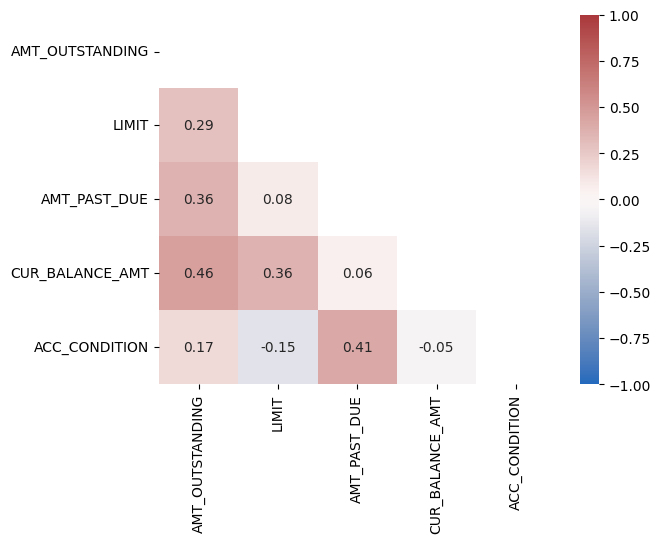

In [ ]:
sns.heatmap(matrix_corr , annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'vlag', mask = mask)

Матрица корреляции для задолжностей по потербительским кредитам

In [ ]:
columns = ['AMT_OUTSTANDING', 'LIMIT', 'AMT_PAST_DUE', 'CUR_BALANCE_AMT', 'ACC_CONDITION']  
matrix_corr = consumer_loan_data[columns].corr().round(2)
matrix_corr

,AMT_OUTSTANDING,LIMIT,AMT_PAST_DUE,CUR_BALANCE_AMT,ACC_CONDITION
AMT_OUTSTANDING,1.00,0.91,0.14,0.47,-0.05
LIMIT,0.91,1.00,0.09,0.79,-0.01
AMT_PAST_DUE,0.14,0.09,1.00,-0.02,0.49
CUR_BALANCE_AMT,0.47,0.79,-0.02,1.00,0.06
ACC_CONDITION,-0.05,-0.01,0.49,0.06,1.00


In [ ]:
mask = np.triu(np.ones_like(matrix_corr, dtype = bool))

<Axes: >

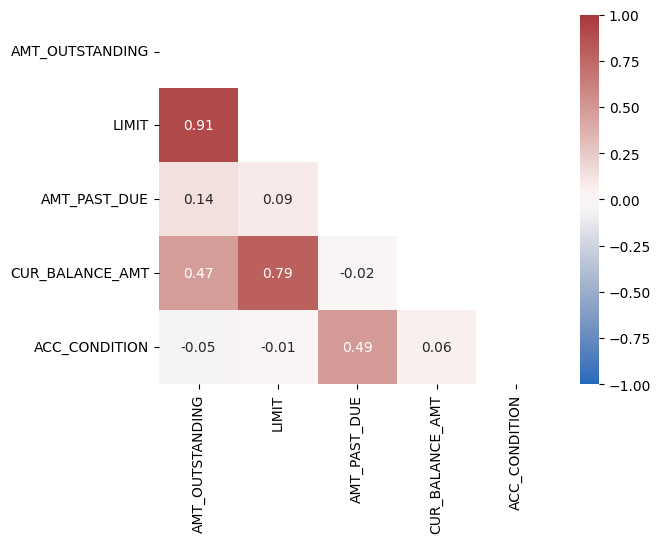

In [ ]:
sns.heatmap(matrix_corr , annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'vlag', mask = mask)

Зависимость месяца  и открытия кредита

In [ ]:
credit_card_data = test_data[test_data['ACCOUNT_TYPE'] == 7]
consumer_loan_data = test_data[test_data['ACCOUNT_TYPE'] == 9]

credit_card_months = pd.to_datetime(credit_card_data['OPENED_DT'], format='%d.%m.%Y').dt.to_period('M')
consumer_loan_months = pd.to_datetime(consumer_loan_data['OPENED_DT'], format='%d.%m.%Y').dt.to_period('M')

credit_card_counts = credit_card_months.value_counts().sort_index()
consumer_loan_counts = consumer_loan_months.value_counts().sort_index()

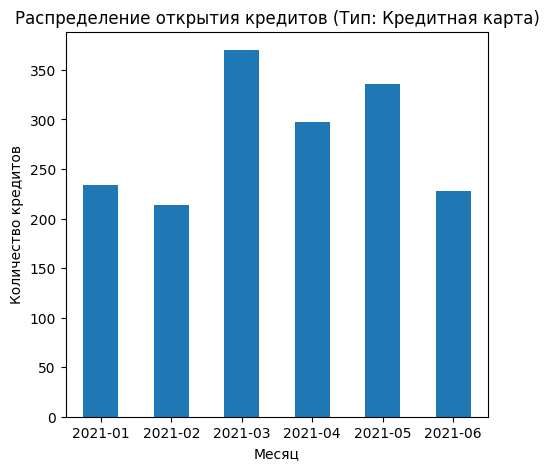

In [ ]:
#Кредитная карта
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
credit_card_counts.plot(kind='bar', rot=0)
plt.xlabel('Месяц')
plt.ylabel('Количество кредитов')
plt.title('Распределение открытия кредитов (Тип: Кредитная карта)')
plt.show()

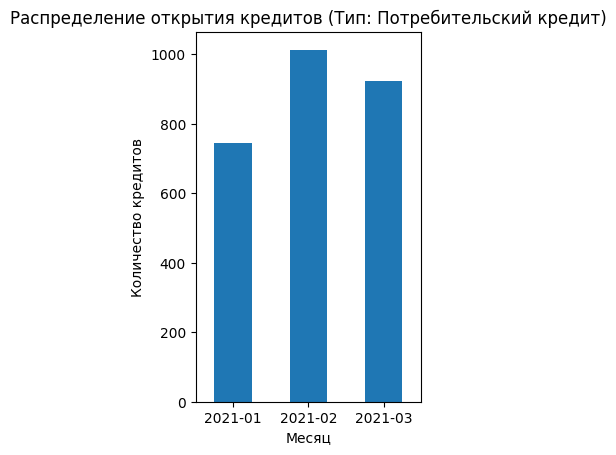

In [ ]:
#Потребительский кредит
plt.subplot(1, 2, 2)
consumer_loan_counts.plot(kind='bar', rot=0)
plt.xlabel('Месяц')
plt.ylabel('Количество кредитов')
plt.title('Распределение открытия кредитов (Тип: Потребительский кредит)')
plt.show()

Процент просроченных кредитов по кредитной карте

In [ ]:
total_records = len(credit_card_data)
overdue_records = len(credit_card_data[credit_card_data['ACC_CONDITION'] == 52])
overdue_ratio = (overdue_records / total_records) * 100
overdue_ratio = round(overdue_ratio, 2)

print('Процент просроченных кредитов по кредитной карте:', overdue_ratio, '%')

Процент просроченных кредитов по кредитной карте: 4.94 %


Процент просроченных кредитов по потребительскому кредиту



In [ ]:
total_records = len(consumer_loan_data)
overdue_records = len(consumer_loan_data[consumer_loan_data['ACC_CONDITION'] == 52])
overdue_ratio = (overdue_records / total_records) * 100
overdue_ratio = round(overdue_ratio, 2)

print('Процент просроченных кредитов по потребительским кредитам:', overdue_ratio, '%')

Процент просроченных кредитов по потребительским кредитам: 3.09 %


Процент задолжностей по типу кредита

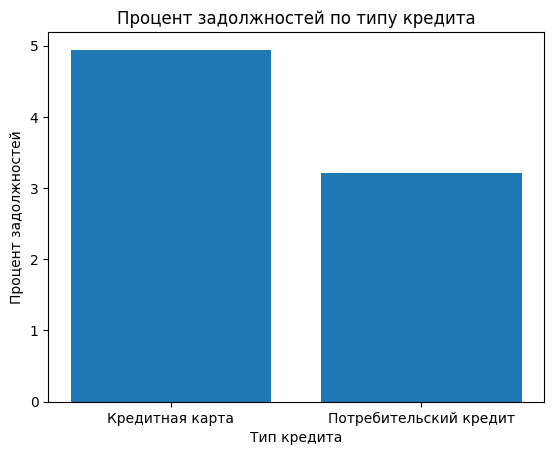

In [ ]:
credit_card_overdue_ratio = (credit_card_data['AMT_PAST_DUE'] > 0).mean() * 100
consumer_loan_overdue_ratio = (consumer_loan_data['AMT_PAST_DUE'] > 0).mean() * 100

plt.bar(['Кредитная карта', 'Потребительский кредит'], [credit_card_overdue_ratio, consumer_loan_overdue_ratio])
plt.xlabel('Тип кредита')
plt.ylabel('Процент задолжностей')
plt.title('Процент задолжностей по типу кредита')

plt.show()

Средний лимит по кредитной карте

In [ ]:
credit_card_data = test_data[(test_data['ACCOUNT_TYPE'] == 7) & (test_data['LIMIT'] > 0)]
average_limit_credit_card = credit_card_data['LIMIT'].mean()  
print('Средний лимит кредита (Кредитная карта):', average_limit_credit_card.round())

Средний лимит кредита (Кредитная карта): 38327.0


Среднее время закрытия потребительского кредита


In [ ]:
closed_loans = consumer_loan_data.loc[consumer_loan_data['ACC_CONDITION'] == 13].copy()

closed_loans.loc[:, 'OPENED_DT'] = pd.to_datetime(closed_loans['OPENED_DT'], format='%d.%m.%Y')
closed_loans.loc[:, 'CLOSED_DT'] = pd.to_datetime(closed_loans['CLOSED_DT'], format='%d.%m.%Y')

closed_loans.loc[:, 'LOAN_DURATION'] = closed_loans['CLOSED_DT'] - closed_loans['OPENED_DT']

average_loan_duration = closed_loans['LOAN_DURATION'].mean()

print('Среднее время закрытия кредита:', average_loan_duration)

Среднее время закрытия кредита: 1547 days 04:50:03.428571424


<ipython-input-192-ff826c35fc28>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  closed_loans.loc[:, 'OPENED_DT'] = pd.to_datetime(closed_loans['OPENED_DT'], format='%d.%m.%Y')
<ipython-input-192-ff826c35fc28>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  closed_loans.loc[:, 'CLOSED_DT'] = pd.to_datetime(closed_loans['CLOSED_DT'], format='%d.%m.%Y')
